# ***Exercise 2***

Objectives

Generate a single Python notebook implementing and answering the following questions:

🔹 Task 1: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

🔹 Task 2: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

🔹 Task 3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

🔹 Task 4: Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.

# *TASK 1*

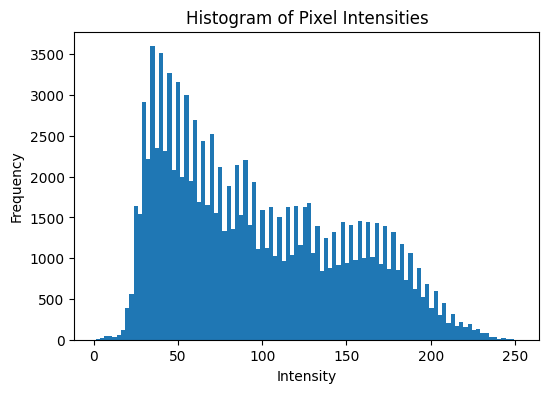

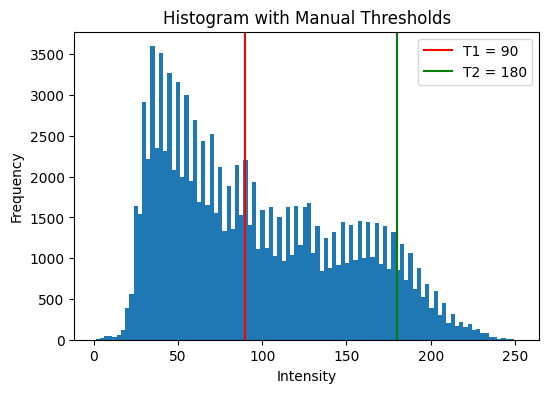

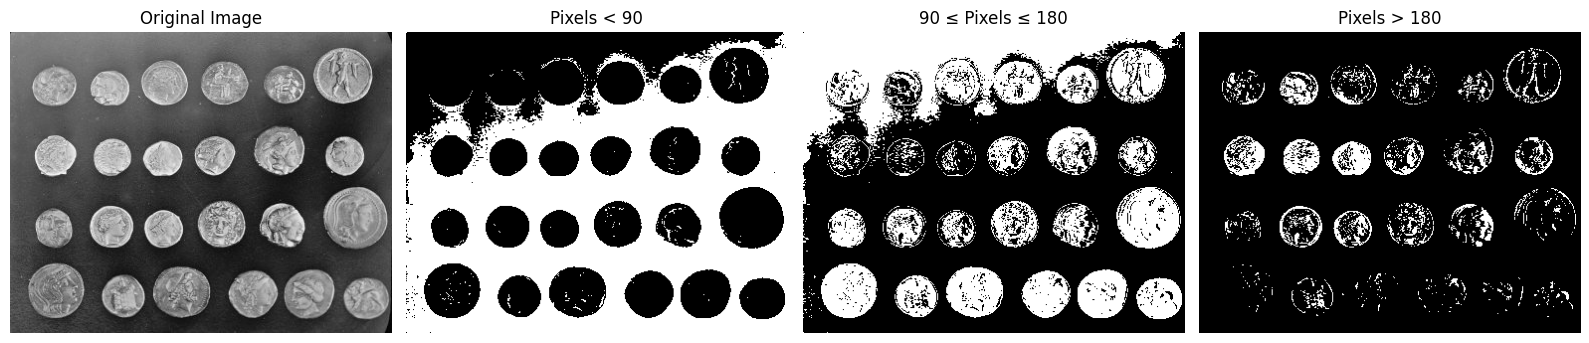

In [3]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt


I = sk.data.coins()

flat_data = I.flatten()  # Flatten the image


fig = plt.figure(figsize=(6, 4))   #hISTOGRAM
n = plt.hist(flat_data, bins=100, range=[1, flat_data.max()])
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt
T1 = 90  # THRESHOLD MANUALLY
T2 = 180


fig = plt.figure(figsize=(6, 4)) # reploted histigram
n = plt.hist(flat_data, bins=100, range=[1, flat_data.max()])
plt.axvline(T1, color='r', label=f'T1 = {T1}')
plt.axvline(T2, color='g', label=f'T2 = {T2}')
plt.title("Histogram with Manual Thresholds")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# segmented regions
seg_1 = I < T1         # Dark regions
seg_2 = (I >= T1) & (I <= T2)  # Mid-tone
seg_3 = I > T2         # Bright regions


fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(seg_1, cmap='gray')
axes[1].set_title(f'Pixels < {T1}')
axes[1].axis('off')

axes[2].imshow(seg_2, cmap='gray')
axes[2].set_title(f'{T1} ≤ Pixels ≤ {T2}')
axes[2].axis('off')

axes[3].imshow(seg_3, cmap='gray')
axes[3].set_title(f'Pixels > {T2}')
axes[3].axis('off')

plt.tight_layout()
plt.show()


# *Task* 2

In [ ]:
#load the iamge and reshape the data as a Nxd array
import skimage as sk
import numpy as np


I = sk.data.coins() # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],I.shape[2]))
print('The sape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],I.shape[2]))

v_I.shape



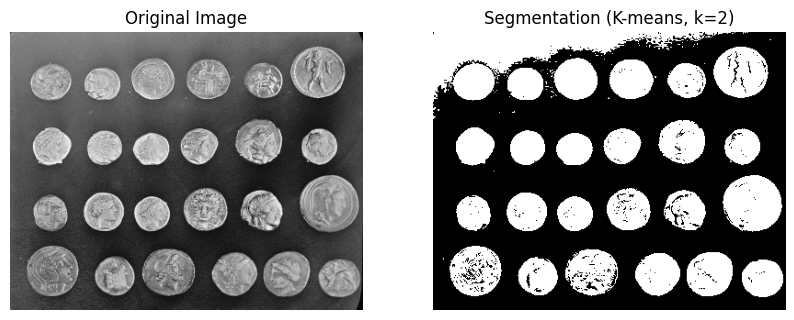

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np
from skimage import data

# Load the 'coins' image and reshape it for clustering
I = data.coins()  # grayscale image
v_I = I.reshape(-1, 1)  # reshape to (n_pixels, 1)

# Fit KMeans clustering with 2 clusters (background vs coins)
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

# Predict cluster labels
v_kmeans = kmeans.predict(v_I)

# Reshape result back to original image shape
I_kmeans = np.reshape(v_kmeans, (I.shape[0], I.shape[1]))

# Optional: invert if foreground = 0
# v_kmeans = np.logical_not(v_kmeans)

# Plot original and segmented result
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap='gray')
ax2.set_title(f'Segmentation (K-means, k={n_clus})')
ax2.axis('off')

plt.show()


The K-Means algorithm performed well on the coins image because it contains two clearly different pixel intensity regions — the dark background and the brighter coins. This makes it a good example for K-Means, which groups pixels based on brightness. Limitation: it does not consider where the pixels are located in the image. It only looks at how bright or dark each pixel is, so: Shadows in the background might be incorrectly grouped with the coins.It may not follow the exact shapes and edges of the coins.



# *Task 3*

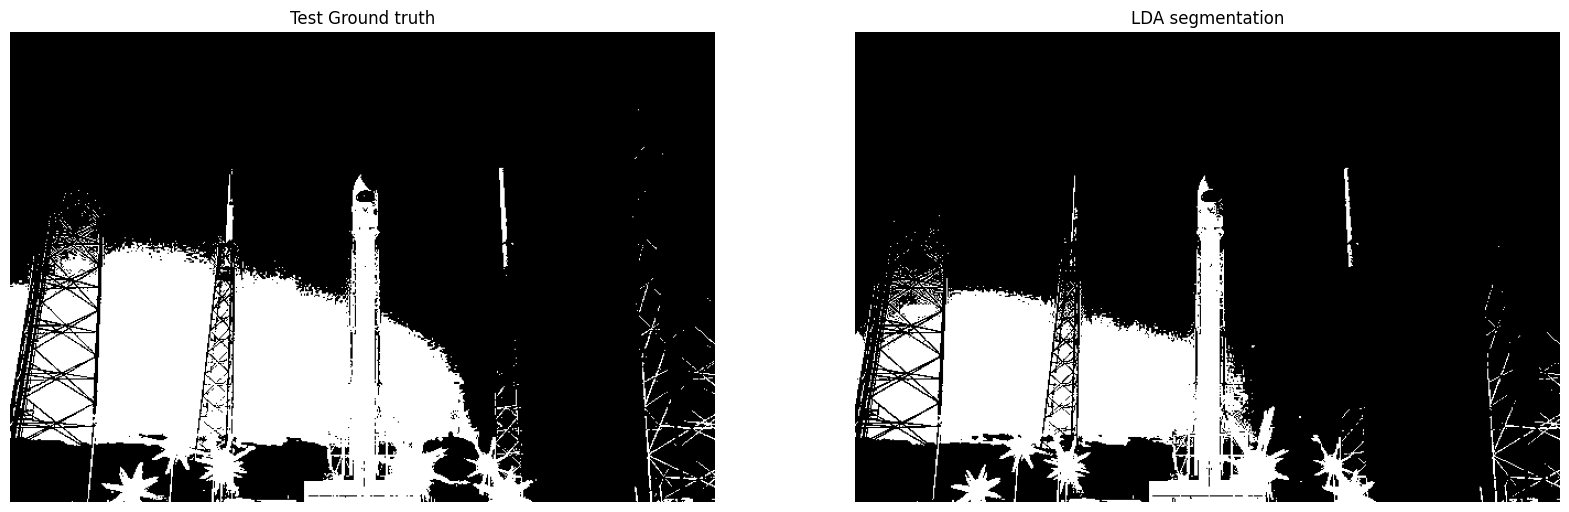

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Load the built-in rocket image and convert to grayscale
I_train = color.rgb2gray(data.rocket())
I_test = I_train.copy()

# Step 2: Create synthetic ground truth using Otsu thresholding
threshold = filters.threshold_otsu(I_train)
I_train_GT = (I_train > threshold).astype(np.uint8)
I_test_GT = I_train_GT.copy()

# Step 3: Reshape image data for LDA training
v_I_train = I_train.reshape(-1, 1)
v_train_GT = I_train_GT.reshape(I_train_GT.shape[0]*I_train_GT.shape[1], 1).astype(np.bool_)

# Step 4: Train LDA classifier
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(v_I_train, v_train_GT.ravel())

# Step 5: Predict test image
v_I_test = I_test.reshape(-1, 1)
v_lda = lda_model.predict(v_I_test)
I_lda = np.array(v_lda).reshape(I_test.shape[0], I_test.shape[1]).astype(np.uint8)

# Step 6: Plot the results
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(I_test_GT, cmap=plt.cm.gray)
ax[0].set_title('Test Ground truth')
ax[0].set_axis_off()

ax[1].imshow(I_lda, cmap=plt.cm.gray)
ax[1].set_title('LDA segmentation')
ax[1].set_axis_off()

plt.show()


effectiveness: LDA is fast and easy to implement. It requires minimal computational power and no complex architecture. In the rocket() image, LDA segments the rocket, towers, and sky effectively because of clear intensity differences.
LImitations of LDA Segmentation
 Assumes linear class separation — not ideal for complex boundaries.
Classifies each pixel independently (no spatial context).
Uses only grayscale intensity, ignoring texture or color.
Not robust to lighting or contrast variations across the image

# *Task* *4*

Supervised vs Unsupervised Segmentation

Supervised segmentation uses labeled data to train a model that can classify pixels.  
Unsupervised segmentation groups pixels based on similarity (e.g., intensity or color) without using any labels.

**Supervised** methods are usually more accurate but need ground truth.  
**Unsupervised** methods are faster and don't need annotations, but results can be less reliable.

 **Example:**  
- Supervised: Using LDA to segment a rocket image based on labeled pixel intensities.  
- Unsupervised: Using K-Means to group image regions with similar colors automatically.
